In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [2]:
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram, cut_tree)
from ISLP.cluster import compute_linkage

## Principal Component Analysis

In [3]:
data = get_rdataset('USArrests').data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


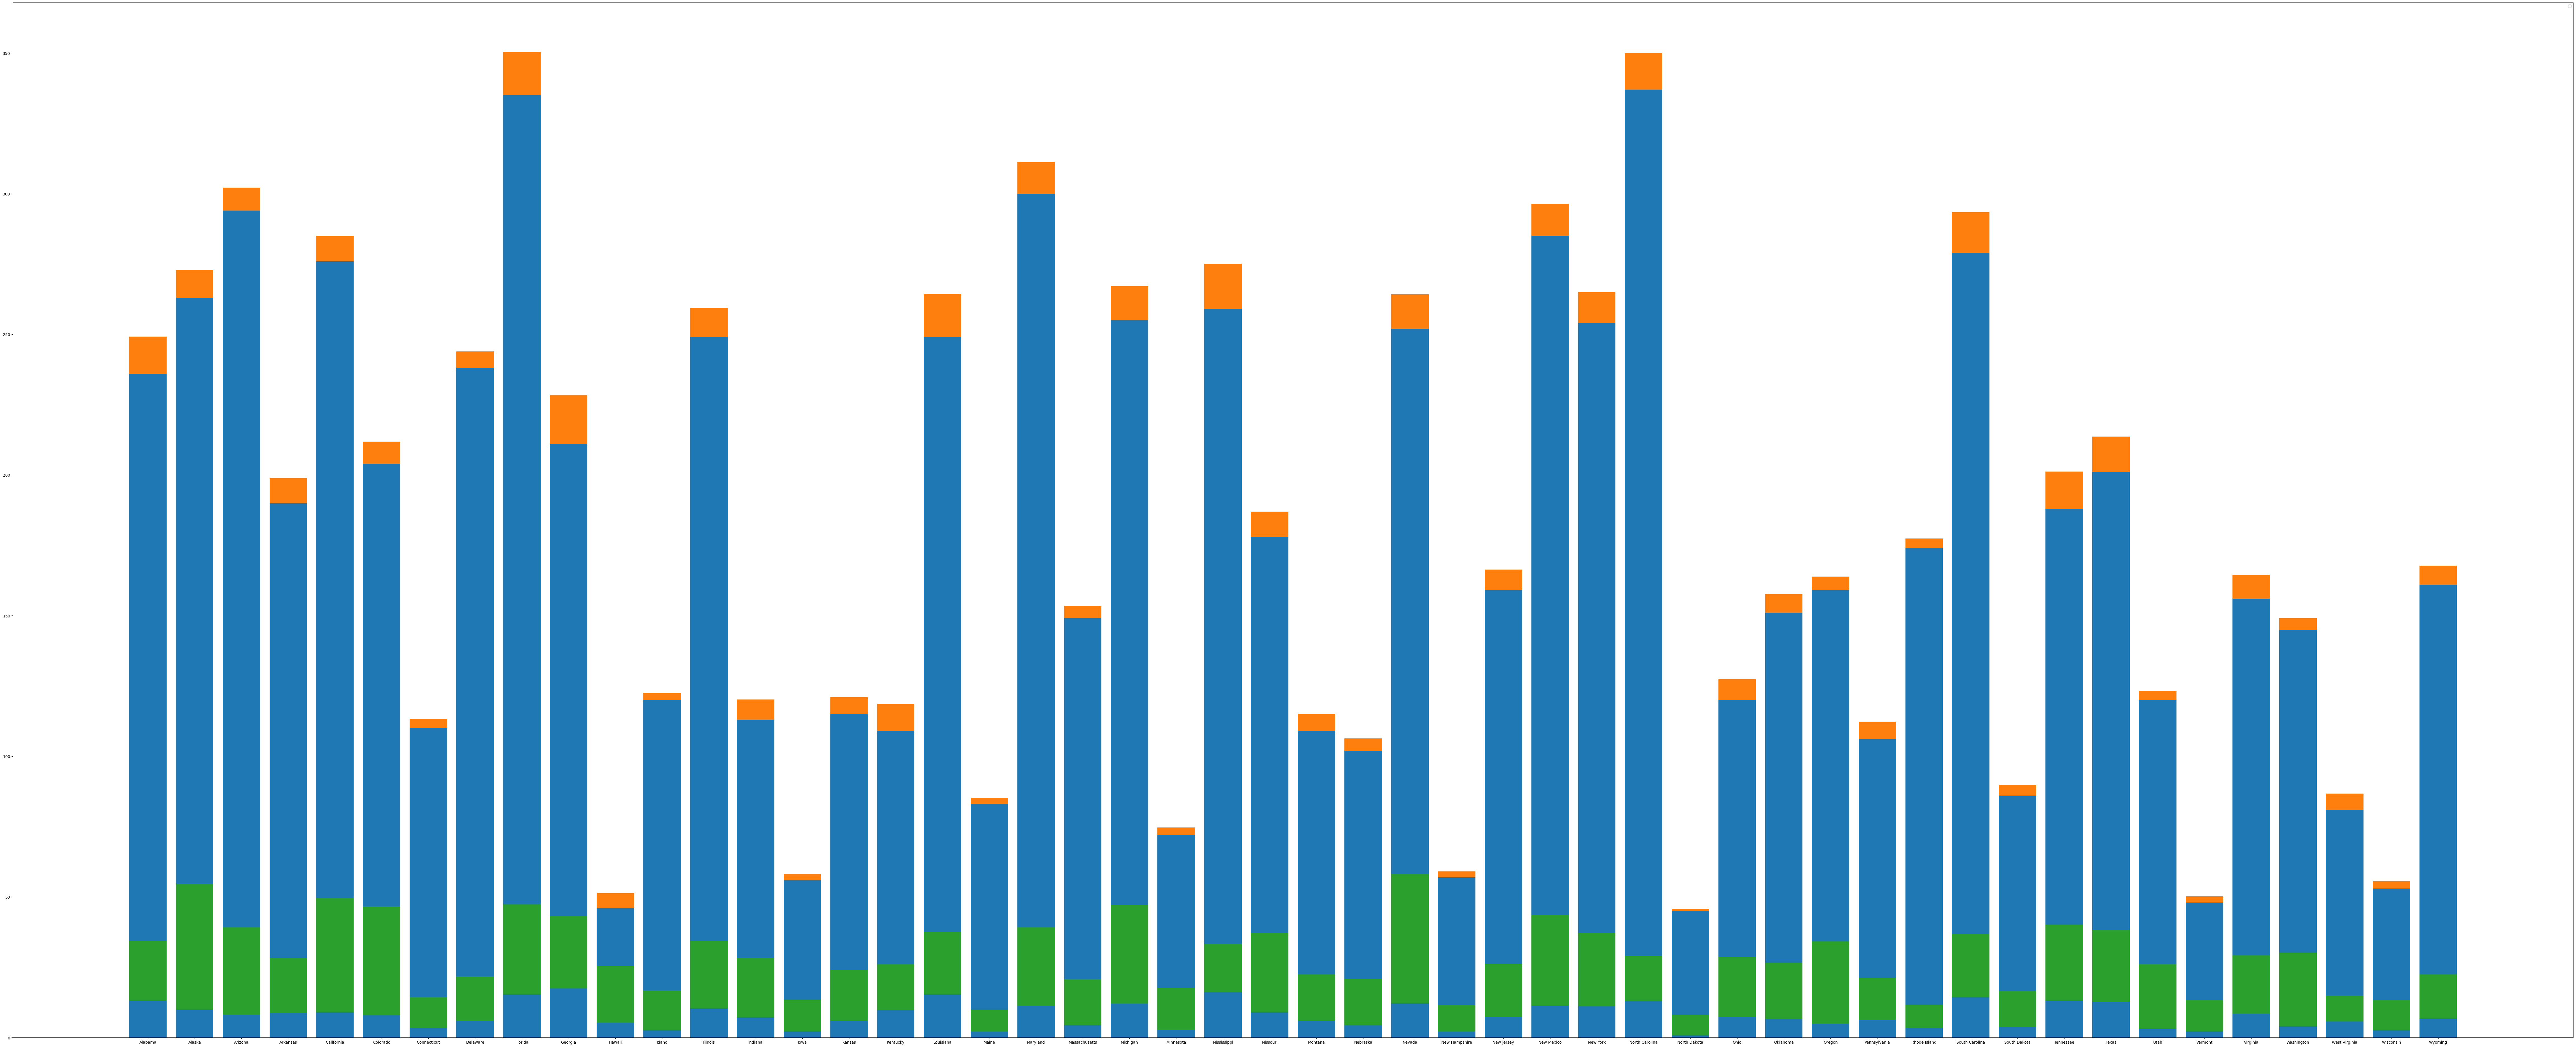

In [51]:
plt.figure(figsize=(118,48))
plt.bar(data.index, data['Assault'])
plt.bar(data.index, data['Murder'],bottom=data['Assault'])
plt.bar(data.index, data['Rape'], bottom=data['Murder'])
plt.legend()
plt.show()

In [52]:
data.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [54]:
# Dataframes have several useful methods for computing column-wise summaries. we can also examine the variance of the four variables using the var() emthod

np.log(data.var())

Murder      2.942883
Assault     8.845801
UrbanPop    5.344813
Rape        4.474254
dtype: float64

In [55]:
#As we can clearly see that the Assault column has the highest variance among all, the predictions or PCA whatever will mostly be driven by it

# So doing standardization is a wise job

scaler=  StandardScaler(with_std=True, with_mean=True)
data_scaled = scaler.fit_transform(data)

In [56]:
data_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [58]:
# checked the scaled data
# Now we shall initialize the PCA and fit the data


pcaUS = PCA()
pcaUS.fit(data_scaled)

PCA()

In [59]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [62]:
# The scores can be computed using the transform()method of pcaUS after it ahs been fit

scores = pcaUS.transform(data_scaled)
scores

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00],
       [-9.12657146e-01, -1.57046001e+00,  5.07818939e-02,
         9.02806864e-01],
       [-1.63979985e+00,  2.10972917e-01,  2.59801342e-01,
      

In [63]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

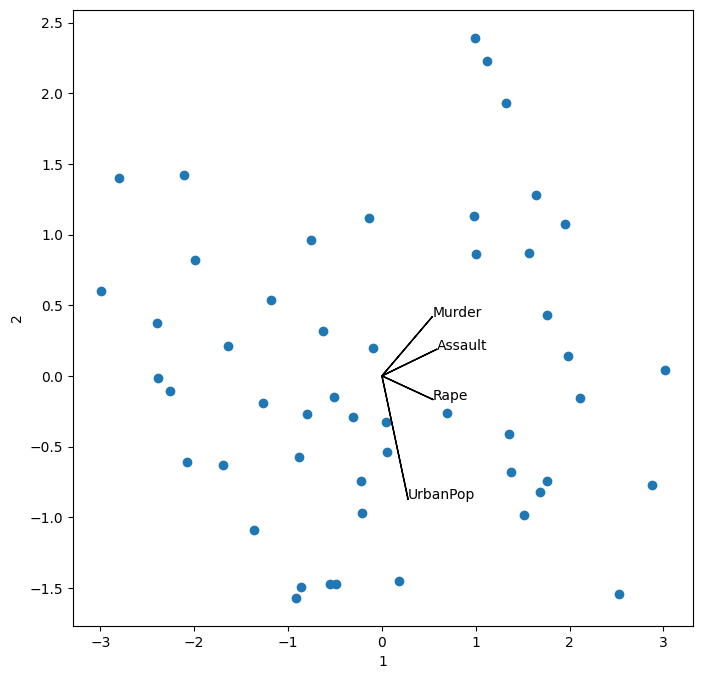

In [66]:
# To visualize the pca, the generally used method is biplot

i, j = 0,1
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel((i+1))
ax.set_ylabel((j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k],pcaUS.components_[j,k], data.columns[k])

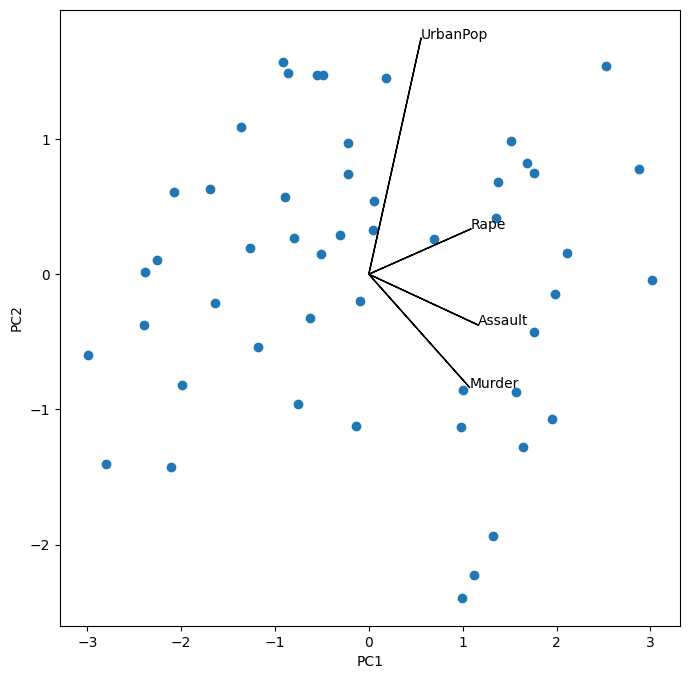

In [68]:
# Notice that this figure is a reflection through the y-axis. Recall that the principal components are only unique up to a sign change, so we can reproduce that figure by flipping the signs of the second set of scores and loading. We also increase the length of the arrows to emphasize the loading

scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape [1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k],s_*pcaUS.components_[j,k],
    data.columns[k])

In [69]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [70]:
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [71]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

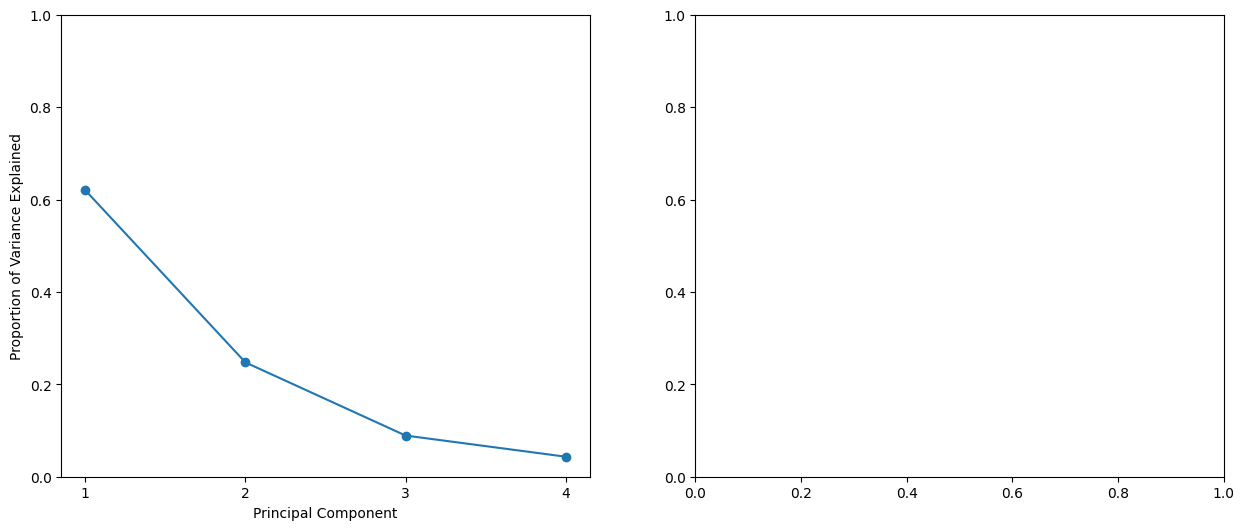

In [74]:
#We can plot the PVE explained by each component, as well as the cumulative PVE. We first plot the proportion of variance  explained

#%%capture

fig, axes = plt.subplots(1, 2, figsize=(15,6))
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks, pcaUS.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

In [75]:
a = np.array([1,2,8,-3])
np.cumsum(a)

array([ 1,  3, 11,  8])

## Matrix Completion

In [76]:
X = data_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [77]:
# The np.linalg.svd() funciton returns three component, U,D,V. The matrix V is equivalent to the loading matrix from principal components. full_matrices=False option ensures that for a tall matrix the shape of U is the same as the shape of X

V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [79]:
U,D

(array([[-0.08850212, -0.16111249,  0.10521861,  0.0530665 ],
        [-0.17511901, -0.15255799, -0.48314515, -0.14893782],
        [-0.15832905,  0.10603826, -0.01297404, -0.2834384 ],
        [ 0.0126993 , -0.15917987, -0.02713511, -0.06208045],
        [-0.22664907,  0.2193291 , -0.14175948, -0.11613802],
        [-0.13600514,  0.14038162, -0.2593365 ,  0.00049746],
        [ 0.1220042 ,  0.15479183,  0.15234621, -0.04023083],
        [-0.00428421,  0.04624999,  0.17019777, -0.29950933],
        [-0.27056601, -0.00557636,  0.13661369, -0.03269718],
        [-0.14720479, -0.18180252,  0.08110669,  0.36566765],
        [ 0.08195504,  0.22324195, -0.01202695,  0.30658269],
        [ 0.1472512 , -0.02998994, -0.06153017, -0.16948994],
        [-0.12382381,  0.09692418,  0.160455  , -0.04143701],
        [ 0.04538956,  0.02154472, -0.05401148,  0.14421152],
        [ 0.20237354,  0.01479136, -0.03897467,  0.00596178],
        [ 0.07155855,  0.03840409, -0.00605193,  0.07012378],
        

In [80]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [81]:
# The matrix U corresponds to a standardized version of the PCA score matrix. Each column standardized to have sumof squares one. If we multiply each column of U by the corresponding element of D, we recover the PCA scores exactly

(U * D[None,:])[:3]

array([[-0.98556588, -1.13339238,  0.44426879,  0.15626714],
       [-1.95013775, -1.07321326, -2.04000333, -0.43858344],
       [-1.76316354,  0.74595678, -0.05478082, -0.83465292]])

In [82]:
scores[:3]

array([[ 0.98556588, -1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775, -1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354,  0.74595678,  0.05478082, -0.83465292]])

In [84]:
# While it would be possible tocarry  out this lab using teh PCA() estimator, here we use the np.linalg.svd() function in order to illustrate its use. We now omit 20 entires in the 50 x 4 data matrix at random. We do so by first selecting 20 rows at random, and then selecting one of the four entries in each row at random. This ensures that every row has at least three observed values

n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True)

Xna = X.copy()
Xna[r_idx, c_idx]= np.nan

In [85]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None, :M]
    return L.dot(V[:M])

In [86]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]


thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

In [87]:
np.random.seed(0)
X = np.random.standard_normal((50,2))
X[:25,0] +=3
X[:25,1]  -= 4

In [88]:
# We can now perform K-means clustering with K=2

kmeans = KMeans(n_clusters=2,
                random_state=2, 
                n_init=20).fit(X)

In [89]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'Kmeans clusterin gresults with k-2')

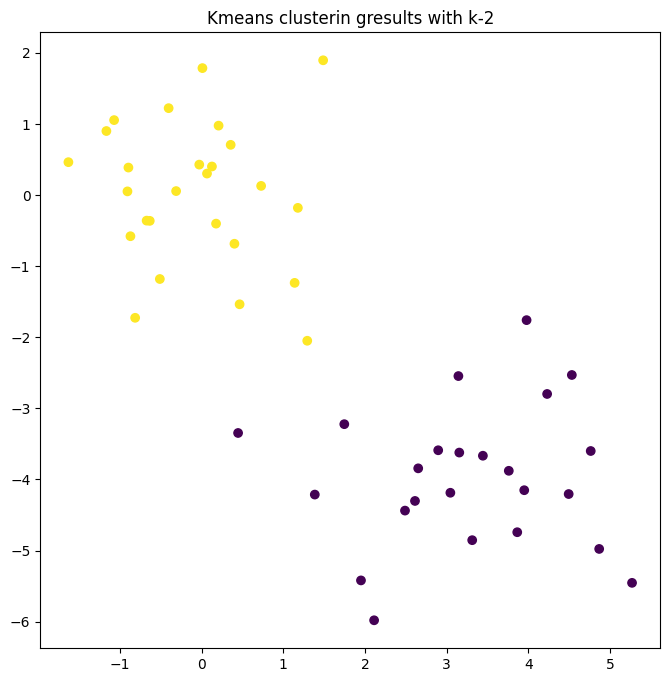

In [90]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("Kmeans clusterin gresults with k-2")

Text(0.5, 1.0, 'Kmeans clustering results with k=3')

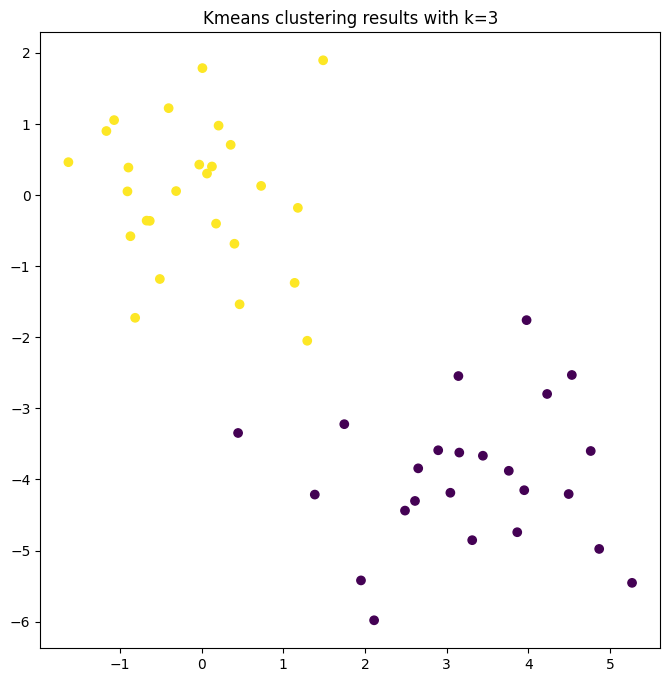

In [91]:
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(X)
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("Kmeans clustering results with k=3")

In [92]:
kmeans1 = KMeans(n_clusters =3,
random_state =3,
n_init =1).fit(X)
kmeans20 = KMeans(n_clusters =3,
random_state =3,
n_init =20).fit(X);
kmeans1.inertia_ , kmeans20.inertia_

(76.85131986999251, 75.06261242745384)

In [ ]:
# kmeans.intertia_ is the total within cluster sum of squares, which we seek to minimize by performing K-means clustering

# It si always recommended to run K-means clusterin gwith a large value of n_init. since otherwise an undesireable local optimum may be obtained.

#

## Hierarchical Clustering

In [93]:
# The AgglomerativeClustering() is used from sklearn.clustering package to perform hierarchical clustering.We will use HClust shorthand for hierarchical clustering

HClust = AgglomerativeClustering
hc_comp  = HClust(distance_threshold=0, n_clusters=None, linkage='complete')
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [94]:
# This computes the entire dedrogram. We could just as easily perform hierarchical clustering with average or single linkage instead

hc_avg = HClust(distance_threshold=0, n_clusters=None, linkage='average')
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0, n_clusters=None, linkage='single')
hc_sing.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

In [95]:
# To use a precomputed distance matrix, we provide an additional argumetn metric='precomputed'. In the code below, the first four lines computes the 50x50 pairwise-distance matrix

D = np.zeros((X.shape[0], X.shape[0]))
for i in range(X.shape[0]):
    x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
    D[i] = np.sqrt(np.sum((X - x_)**2, 1))

hc_sing_pre = HClust(distance_threshold=0, n_clusters=None, metric='precomputed', linkage='single')

hc_sing_pre.fit(D)

AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

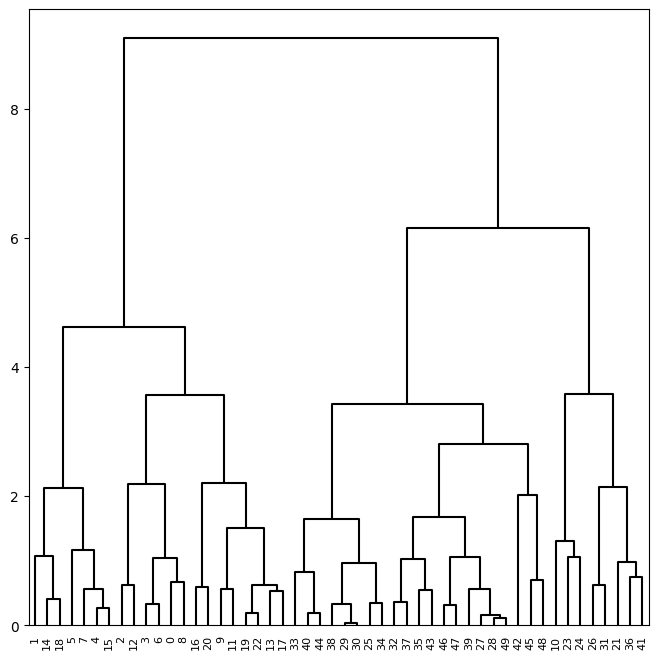

In [99]:
# We use dendrogram() from scipy.cluster.hierarchy to plot the dendrogram. However dedrogram() expects a  so-called linkage matrix represntation of the clustering, which is not provided by AgglomerativeCluster() but can be computed. The funciton compute_linkage() in the ISLP.cluster package is provided for this purpose.


cargs = {'color_threshold': -np.inf, 'above_threshold_color':'black'}
linkage_compt = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
dendrogram(linkage_compt,ax=ax,**cargs)
plt.show()

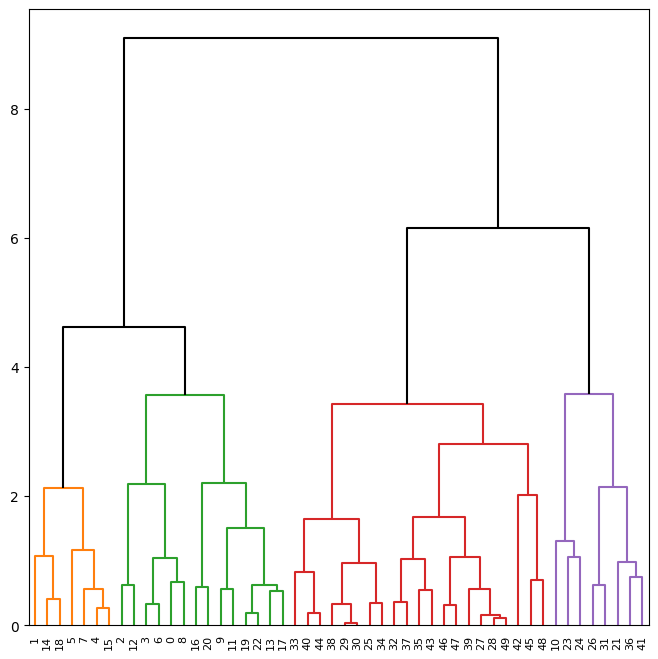

In [101]:
# Lets cut the tree at a height of 4, coloring links that merge above 4 in black

fig, ax = plt.subplots(1, 1, figsize=(8,8))
dendrogram(linkage_compt,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black')
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [160.0, 160.0, 190.0, 190.0],
  [140.0, 140.0, 175.0, 175.0],
  [95.0, 95.0, 157.5, 157.5],
  [28.125, 28.125, 126.25, 126.25],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [222.5, 222.5, 266.25, 266.25],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 375.0, 385.0, 38

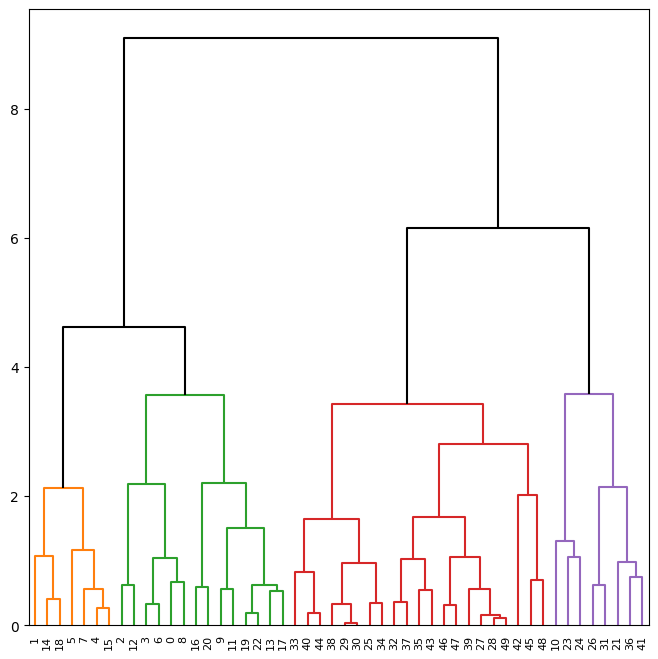

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

dendrogram(linkage_compt,ax=ax,color_threshold=4, above_threshold_color='black')

In [103]:
# To determine the cluster labels for each observation associated witha given cut of the dedrogram, we can use the cut_tree() funciton formk scipy.cluster.hierarchy

cut_tree(linkage_compt, n_clusters=4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

In [105]:
# This can also be achieved by providing an argument n_clusters to HClust() however each cut would require recomputing the clustering.Similarly, trees may be cut by distance threshold with an argument of distance_threshold to HClust() or height to cut_tree()

cut_tree(linkage_compt, height=5)
plt.show()

Text(0.5, 1.0, 'Hierarchical Clustering with Scaled Features')

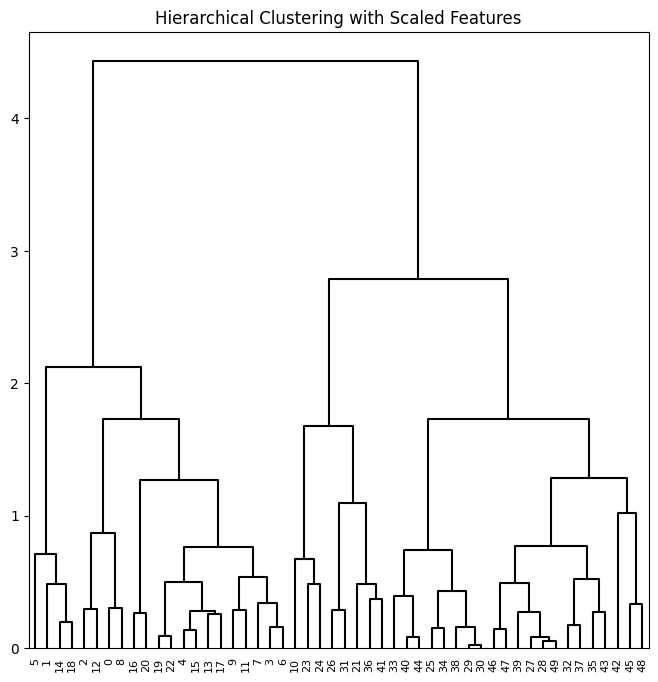

In [107]:
# To scale the variable before performing heirarchical clustering of the observations, we use StandardSclaer() as in our PCA exmple

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0, n_clusters=None, linkage='complete').fit(X_scale)


linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
dendrogram(linkage_comp_scale, ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features")

In [108]:
# Correlation based distances between observation can be used for clustering. The correlation between two observations measures the similarity of their feature values. With n observations the n x n correlation matrix can then be used as a similarity matrix so that one minus the correlation matrix is the dissimilarity matrix used for clustering.

X  = np.random.standard_normal((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor =HClust(linkage='complete', distance_threshold=0, n_clusters=None, metric='precomputed')

hc_cor.fit(corD)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='precomputed', n_clusters=None)